<img src="img/dh_logo.png" align="right" width="50%">

# Desafio 5

# Santander Kaggle
## Customer Transaction Prediction

<img src="img/santander.png"  >

### Neste desafio será necessário prever a variável target do DataSet

Para acessar e participar desta competição no Kaggle [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)

Para baixar os dados [clique aqui](https://www.kaggle.com/c/santander-customer-transaction-prediction/data)

## Santander: Overview da proposta do desafio

No Santander, nossa missão é ajudar pessoas e empresas a prosperar. Estamos sempre procurando maneiras de ajudar nossos clientes a entender sua saúde financeira e identificar quais produtos e serviços podem ajudá-los a atingir suas metas monetárias.

Nossa equipe de ciência de dados está desafiando continuamente nossos algoritmos de aprendizado de máquina, trabalhando com a comunidade global de dados científicos para garantir que possamos identificar com mais precisão novas maneiras de resolver nosso desafio mais comum, problemas de classificação binária como: um cliente está satisfeito? Um cliente comprará este produto? Um cliente pode pagar este empréstimo?

Neste desafio, convidamos a Kagglers a nos ajudar a identificar quais clientes farão uma transação específica no futuro, independentemente do volume de dinheiro transacionado. Os dados fornecidos para esta competição têm a mesma estrutura que os dados reais que temos disponíveis para resolver este problema.

# Algumas possibilidades a serem consideradas para desenvolvimento neste Desafio:

1. Explorar as variáveis explicatórias do problema e entender como elas influenciam na variável target


2. Identificar possíveis soluções para resolver o desbalancemanto de classes da variável target


3. Entender a explicabilidade dos dados utilizando diferentes técnicas não supervisionadas e medir como os modelos respondem 


4. Buscar algumas formas de selecionar as melhores variáveis para classificar as fraudes e medir os resultados em um modelo preditor


5. Verificar se a redução de dimensionalidade pode ajudar na explicação das fraudes, com suficiente nível de informação, e medir os resultados em um modelo preditor


6. Submeter o melhor resultado na plataforma Kaggle. Para isso, verifique qual a métrica adotada pelo examinador do desafio



# DESAFIO 5 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def EDA (df):
    df= df.rename(columns=str.lower)

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    
    colunas = sorted(df.columns.str.lower().tolist(), reverse=False)
    
    eda_df['Mean'] = np.round(df.mean(), 2)
    eda_df['Median'] = np.round(df.median(), 2)
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))
    
    print('dtypes: ')
    print('memory usage: ')

    return eda

## Importando os Dados

In [3]:
%%time
df = pd.read_csv('data/train.csv')

Wall time: 7.96 s


In [4]:
df.head(20)

ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0    train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834   
1    train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433   
2    train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837   
3    train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361   
4    train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486   
5    train_5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609   
6    train_6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198   
7    train_7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310   
8    train_8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630   
9    train_9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859   
10  train_10       0   5.0702 -0.5447   9.5900  4.2987  12.3910 -18.8687   
11  train_11       0  12.7188 -7.9750  10.3757  9.0101  12.8570 -12.0852   
12  train_12       0   8.7671 -4.6154   9.7242  7.4242   9.0254   1.4247   
13  train_13       1  16.3699  1.5934  16.7395  7.3330  12.1450   5.9004   
14  train_14       0  13.8080  5.0514  17.2611  8.5120  12.8517  -9.1622   
15  train_15       0   3.9416  2.6562  13.3633  6.8895  12.2806 -16.1620   
16  train_16       0   5.0615  0.2689  15.1325  3.6587  13.5276  -6.5477   
17  train_17       0   8.4199 -1.8128   8.1202  5.3955   9.7184 -17.8390   
18  train_18       0   4.8750  1.2646  11.9190  8.4650  10.7203  -0.6707   
19  train_19       0   4.4090 -0.7863  15.1828  8.0631  11.2831  -0.7356   

     var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
0   5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
1   5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
2   6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
3   5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
4   5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   
5   4.5322  15.2255  ...  -6.3068   6.6025   5.2912   0.4403  14.9452   
6   6.1961  12.0771  ...   8.7830   6.4521   3.5325   0.1777  18.3314   
7   5.6890  22.3262  ...  13.1700   6.5491   3.9906   5.8061  23.1407   
8   4.4514  10.1854  ...   1.4298  14.7510   1.6395   1.4181  14.8370   
9   6.0637  16.8410  ...   0.5543   6.3160   1.0371   3.6885  14.8344   
10  6.0382  14.3797  ...   7.2780   8.0819   0.2139  -0.0761  14.9585   
11  5.6464  11.8370  ...  -0.8901   2.6559  -0.0503   5.5946  13.6152   
12  6.2815  12.3143  ...   0.3782   7.4382   0.0854   1.3444  17.2439   
13  4.8222  20.9729  ...   7.4002   7.4031   4.3989   4.0978  17.3638   
14  5.7327  21.0517  ...   1.0740   8.3220   3.2619   1.6738  17.4797   
15  5.6979  14.4573  ...  -3.4195   0.8829  -1.9859   3.9905  22.4647   
16  5.2757   9.8710  ...   0.2717   7.2854   0.5670   8.1822  19.5616   
17  4.0959  15.2860  ...   7.4363  11.3072   3.7903   0.0290  16.2954   
18  5.6103  16.4661  ...   9.1843   2.6812   1.8587   4.6929  16.0916   
19  6.3801  16.0218  ...   5.9745   6.3267   2.5156   8.9878  16.0550   

    var_195  var_196  var_197  var_198  var_199  
0   -2.3978   7.8784   8.5635  12.7803  -1.0914  
1    2.0339   8.1267   8.7889  18.3560   1.9518  
2    3.1417  -6.5213   8.2675  14.7222   0.3965  
3   -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4   -1.5121   3.9267   9.5031  17.9974  -8.8104  
5    1.0314  -3.6241   9.7670  12.5809  -4.7602  
6    0.5845   9.1104   9.1143  10.8869  -3.2097  
7   -0.3776   4.2178   9.4237   8.6624   3.4806  
8   -1.9940  -1.0733   8.1975  19.5114   4.8453  
9    0.4467  14.1287   7.9133  16.2375  14.2514  
10  -1.2160   6.6576   9.2553  14.2914  -7.6652  
11   2.4058  -1.7183   9.6745  16.7498  -3.9728  
12  -0.0798   5.7389   8.4897  17.0938   4.6106  
13  -1.3022   9.6846   9.0419  15.6064 -10.8529  
14  -0.0257  -3.5323   9.3439  24.4479  -5.1110  
15   0.5129   6.5273   8.2899  12.9116  -4.9182  
16   0.4365  -3.4975   8

In [5]:
df.drop("ID_code", axis=1, inplace=True)
df.head(5)

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

## Análise Inicial dos Dados

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe().T)

count       mean        std      min        25%       50%  \
target   200000.0   0.100490   0.300653   0.0000   0.000000   0.00000   
var_0    200000.0  10.679914   3.040051   0.4084   8.453850  10.52475   
var_1    200000.0  -1.627622   4.050044 -15.0434  -4.740025  -1.60805   
var_2    200000.0  10.715192   2.640894   2.1171   8.722475  10.58000   
var_3    200000.0   6.796529   2.043319  -0.0402   5.254075   6.82500   
var_4    200000.0  11.078333   1.623150   5.0748   9.883175  11.10825   
var_5    200000.0  -5.065317   7.863267 -32.5626 -11.200350  -4.83315   
var_6    200000.0   5.408949   0.866607   2.3473   4.767700   5.38510   
var_7    200000.0  16.545850   3.418076   5.3497  13.943800  16.45680   
var_8    200000.0   0.284162   3.332634 -10.5055  -2.317800   0.39370   
var_9    200000.0   7.567236   1.235070   3.9705   6.618800   7.62960   
var_10   200000.0   0.394340   5.500793 -20.7313  -3.594950   0.48730   
var_11   200000.0  -3.245596   5.970253 -26.0950  -7.510600  -3.28695   
var_12   200000.0  14.023978   0.190059  13.4346  13.894000  14.02550   
var_13   200000.0   8.530232   4.639536  -6.0111   5.072800   8.60425   
var_14   200000.0   7.537606   2.247908   1.0133   5.781875   7.52030   
var_15   200000.0  14.573126   0.411711  13.0769  14.262800  14.57410   
var_16   200000.0   9.333264   2.557421   0.6351   7.452275   9.23205   
var_17   200000.0  -5.696731   6.712612 -33.3802 -10.476225  -5.66635   
var_18   200000.0  15.244013   7.851370 -10.6642   9.177950  15.19625   
var_19   200000.0  12.438567   7.996694 -12.4025   6.276475  12.45390   
var_20   200000.0  13.290894   5.876254  -5.4322   8.627800  13.19680   
var_21   200000.0  17.257883   8.196564 -10.0890  11.551000  17.23425   
var_22   200000.0   4.305430   2.847958  -5.3225   2.182400   4.27515   
var_23   200000.0   3.019540   0.526893   1.2098   2.634100   3.00865   
var_24   200000.0  10.584400   3.777245  -0.6784   7.613000  10.38035   
var_25   200000.0  13.667496   0.285535  12.7200  13.456400  13.66250   
var_26   200000.0  -4.055133   5.922210 -24.2431  -8.321725  -4.19690   
var_27   200000.0  -1.137908   1.523714  -6.1668  -2.307900  -1.13210   
var_28   200000.0   5.532980   0.783367   2.0896   4.992100   5.53485   
var_29   200000.0   5.053874   2.615942  -4.7872   3.171700   4.95020   
var_30   200000.0  -7.687740   7.965198 -34.7984 -13.766175  -7.41175   
var_31   200000.0  10.393046   2.159891   2.1406   8.870000  10.36565   
var_32   200000.0  -0.512886   2.587830  -8.9861  -2.500875  -0.49765   
var_33   200000.0  14.774147   4.322325   1.5085  11.456300  14.57600   
var_34   200000.0  11.434250   0.541614   9.8169  11.032300  11.43520   
var_35   200000.0   3.842499   5.179559 -16.5136   0.116975   3.91775   
var_36   200000.0   2.187230   3.119978  -8.0951  -0.007125   2.19800   
var_37   200000.0   5.868899   2.249730  -1.1834   4.125475   5.90065   
var_38   200000.0  10.642131   4.278903  -6.3371   7.591050  10.56270   
var_39   200000.0   0.662956   4.068845 -14.5457  -2.199500   0.67230   
var_40   200000.0  -6.725505   8.279259 -35.2117 -12.831825  -6.61745   
var_41   200000.0   9.299858   5.938088  -8.5359   4.519575   9.16265   
var_42   200000.0  11.222356   0.695991   8.8590  10.713200  11.24340   
var_43   200000.0  11.569954   0.309599  10.6528  11.343800  11.56500   
var_44   200000.0   8.948289   5.903073  -9.9396   5.313650   9.43720   
var_45   200000.0 -12.699667  21.404912 -90.2525 -28.730700 -12.54720   
var_46   200000.0  11.326488   2.860511   1.2062   9.248750  11.31075   
var_47   200000.0 -12.471737  10.579862 -47.6862 -20.654525 -12.48240   
var_48   200000.0  14.704713  11.384332 -23.9022   6.351975  14.55920   
var_49   200000.0  16.682499   7.855762  -8.0707  10.653475  16.67240   
var_50   200000.0  12.740986   0.691709  10.3855  12.269000  12.74560   
var_51   200000.0  13.428912   8.187306 -15.0462   7.267625  13.44440   
var_52   200000.0  -2.528816   4.985532 -24.7214  -6.065025  -2.50245 

<p style="font-size:20px;">A média da variável target aponta para uma proporção 1/9 entre os valores 0 e 1 (<span style="color:red">dados desbalanceado</span>).</p>

In [7]:
%%capture --no-display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(EDA(df))

Amount_NaN  %_NaN    DType  Amount_Data   Mean  Median      Max  \
target            0    0.0    int64       200000   0.10    0.00   1.0000   
var_0             0    0.0  float64       200000  10.68   10.52  20.3150   
var_1             0    0.0  float64       200000  -1.63   -1.61  10.3768   
var_2             0    0.0  float64       200000  10.72   10.58  19.3530   
var_3             0    0.0  float64       200000   6.80    6.82  13.1883   
var_4             0    0.0  float64       200000  11.08   11.11  16.6714   
var_5             0    0.0  float64       200000  -5.07   -4.83  17.2516   
var_6             0    0.0  float64       200000   5.41    5.39   8.4477   
var_7             0    0.0  float64       200000  16.55   16.46  27.6918   
var_8             0    0.0  float64       200000   0.28    0.39  10.1513   
var_9             0    0.0  float64       200000   7.57    7.63  11.1506   
var_10            0    0.0  float64       200000   0.39    0.49  18.6702   
var_11            0    0.0  float64       200000  -3.25   -3.29  17.1887   
var_12            0    0.0  float64       200000  14.02   14.03  14.6545   
var_13            0    0.0  float64       200000   8.53    8.60  22.3315   
var_14            0    0.0  float64       200000   7.54    7.52  14.9377   
var_15            0    0.0  float64       200000  14.57   14.57  15.8633   
var_16            0    0.0  float64       200000   9.33    9.23  17.9506   
var_17            0    0.0  float64       200000  -5.70   -5.67  19.0259   
var_18            0    0.0  float64       200000  15.24   15.20  41.7480   
var_19            0    0.0  float64       200000  12.44   12.45  35.1830   
var_20            0    0.0  float64       200000  13.29   13.20  31.2859   
var_21            0    0.0  float64       200000  17.26   17.23  49.0443   
var_22            0    0.0  float64       200000   4.31    4.28  14.5945   
var_23            0    0.0  float64       200000   3.02    3.01   4.8752   
var_24            0    0.0  float64       200000  10.58   10.38  25.4460   
var_25            0    0.0  float64       200000  13.67   13.66  14.6546   
var_26            0    0.0  float64       200000  -4.06   -4.20  15.6751   
var_27            0    0.0  float64       200000  -1.14   -1.13   3.2431   
var_28            0    0.0  float64       200000   5.53    5.53   8.7874   
var_29            0    0.0  float64       200000   5.05    4.95  13.1431   
var_30            0    0.0  float64       200000  -7.69   -7.41  15.6515   
var_31            0    0.0  float64       200000  10.39   10.37  20.1719   
var_32            0    0.0  float64       200000  -0.51   -0.50   6.7871   
var_33            0    0.0  float64       200000  14.77   14.58  29.5466   
var_34            0    0.0  float64       200000  11.43   11.44  13.2878   
var_35            0    0.0  float64       200000   3.84    3.92  21.5289   
var_36            0    0.0  float64       200000   2.19    2.20  14.2456   
var_37            0    0.0  float64       200000   5.87    5.90  11.8638   
var_38            0    0.0  float64       200000  10.64   10.56  29.8235   
var_39            0    0.0  float64       200000   0.66    0.67  15.3223   
var_40            0    0.0  float64       200000  -6.73   -6.62  18.1056   
var_41            0    0.0  float64       200000   9.30    9.16  26.1658   
var_42            0    0.0  float64       200000  11.22   11.24  13.4696   
var_43            0    0.0  float64       200000  11.57   11.56  12.5779   
var_44            0    0.0  float64       200000   8.95    9.44  34.1961   
var_45            0    0.0  float64       200000 -12.70  -12.55  62.0844   
var_46            0    0.0  float64       200000  11.33   11.31  21.2939   
var_47            0    0.0  float64       200000 -12.47  -12.48  20.6854   
var_48            0    0.0  float64       200000  14.70   14.56  54.2738   
var_49            0    0.0  float64       200000  16.68   16.67  41.1530   
var_50            0    0.0  float64       200000  12.74  

<ul style="font-size:20px;">
  <li>Nenhum dado categórico (a exceção do target)</li>
  <li>Nenhum dado faltante</li>
</ul>

## Análise de Correlação

In [8]:
df_corr = df.corr()

### Heatmap

<AxesSubplot:>

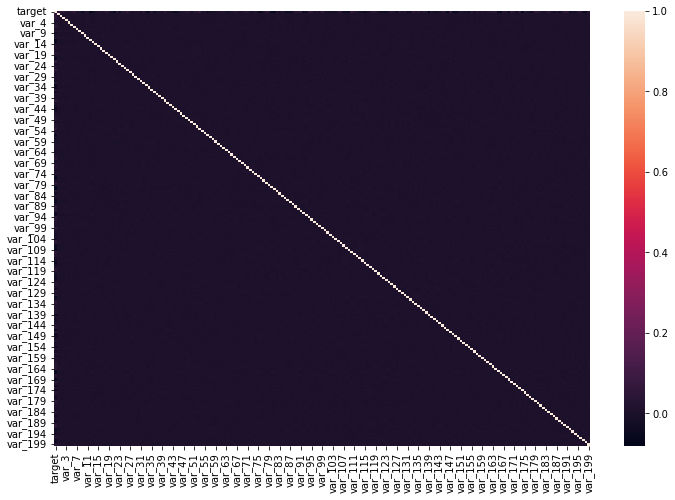

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr)

<p style="font-size:20px;">
As correlações pouco significantes, mas devido a quantidade de features é difícil ver claramente.
Vamos subdividir o heatmap para ver os dados com mais detalhes:
</p>

### Heatmap - Primeiro Quartil

<AxesSubplot:>

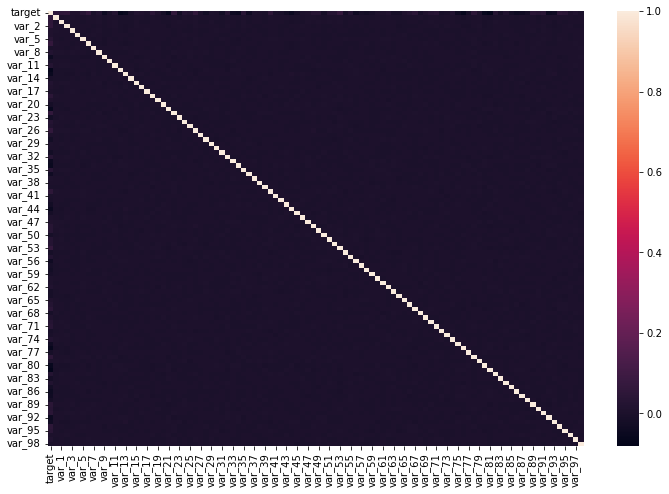

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[0:100,0:100])

### Heatmap - Segundo Quartil

<AxesSubplot:>

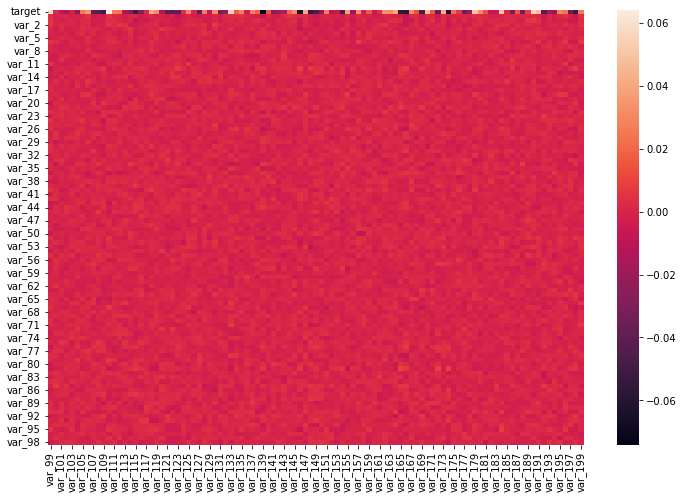

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[0:100,100:])

### Heatmap - Terceiro Quartil

<AxesSubplot:>

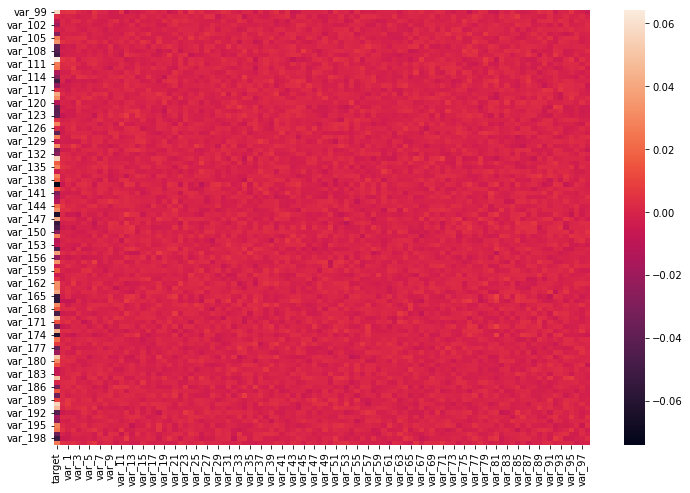

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[100:,0:100])

### Heatmap - Quarto Quartil

<AxesSubplot:>

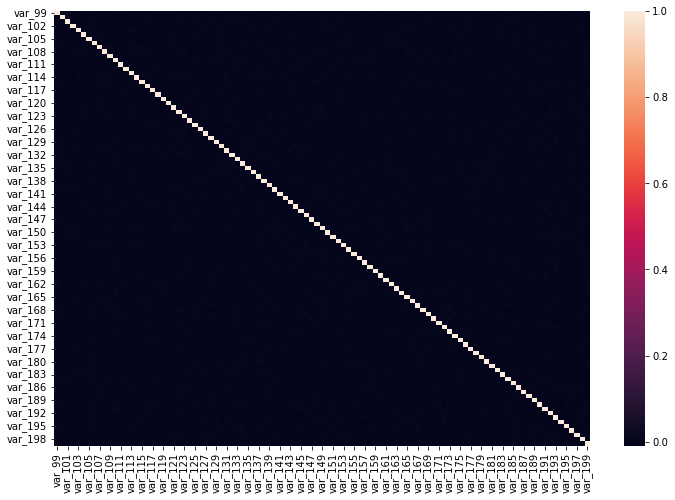

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[100:,100:])

<p style="font-size:20px;">
Não parecem haver correlações maiores que 0.1.
</p>
<p style="font-size:20px;">
Vamos olhar para os dados numéricos para ter mais clareza das relações
</p>

### Correlação: DataFrame

In [14]:
corr = df_corr.stack()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr = pd.DataFrame(corr, columns = ['corr']).drop_duplicates()
corr = abs(corr).sort_values('corr', ascending = False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(corr)

corr
target  var_81   8.091733e-02
        var_139  7.407963e-02
        var_12   6.948928e-02
        var_6    6.673085e-02
        var_110  6.427530e-02
        var_146  6.364388e-02
        var_53   6.339861e-02
        var_26   6.242219e-02
        var_76   6.191747e-02
        var_174  6.166907e-02
        var_22   6.055842e-02
        var_21   5.848274e-02
        var_99   5.836702e-02
        var_166  5.777303e-02
        var_80   5.760948e-02
        var_190  5.597341e-02
        var_2    5.587035e-02
        var_165  5.573379e-02
        var_13   5.515628e-02
        var_148  5.501109e-02
        var_133  5.454762e-02
        var_198  5.299964e-02
        var_34   5.269211e-02
        var_0    5.238959e-02
        var_1    5.034263e-02
        var_115  5.017424e-02
        var_179  5.000177e-02
        var_109  4.992600e-02
        var_40   4.953026e-02
        var_44   4.903939e-02
        var_169  4.838218e-02
        var_184  4.831541e-02
        var_78   4.824466e-02
        var_170  4.797278e-02
        var_149  4.731908e-02
        var_191  4.711368e-02
        var_94   4.629577e-02
        var_92   4.629526e-02
        var_154  4.610604e-02
        var_108  4.479116e-02
        var_67   4.467337e-02
        var_33   4.433393e-02
        var_18   4.347904e-02
        var_192  4.285840e-02
        var_9    4.280550e-02
        var_122  4.246106e-02
        var_173  4.202224e-02
        var_164  4.099670e-02
        var_118  4.035785e-02
        var_123  4.029134e-02
        var_147  4.027953e-02
        var_91   4.012717e-02
        var_107  3.999698e-02
        var_121  3.978829e-02
        var_89   3.936862e-02
        var_86   3.912624e-02
        var_127  3.912488e-02
        var_95   3.853056e-02
        var_36   3.839659e-02
        var_75   3.808113e-02
        var_172  3.797647e-02
        var_155  3.723951e-02
        var_177  3.686307e-02
        var_35   3.656718e-02
        var_87   3.586020e-02
        var_197  3.530274e-02
        var_93   3.506999e-02
        var_56   3.499951e-02
        var_188  3.401458e-02
        var_71   3.360651e-02
        var_106  3.294690e-02
        var_162  3.264700e-02
        var_157  3.264248e-02
        var_131  3.238033e-02
        var_48   3.233439e-02
        var_163  3.181118e-02
        var_180  3.119043e-02
        var_5    3.097863e-02
        var_119  3.097509e-02
        var_145  3.091653e-02
        var_167  3.079676e-02
        var_49   3.061153e-02
        var_32   3.051330e-02
        var_186  3.042103e-02
        var_130  2.991733e-02
        var_141  2.970094e-02
        var_90   2.939546e-02
        var_43   2.855663e-02
        var_24   2.847742e-02
        var_195  2.828454e-02
        var_125  2.822278e-02
        var_135  2.794426e-02
        var_52   2.775359e-02
        var_151  2.752447e-02
        var_137  2.718969e-02
        var_128  2.690899e-02
        var_70   2.674768e-02
        var_111  2.668598e-02
        var_104  2.660533e-02
        var_114  2.626621e-02
        var_51   2.599245e-02
        var_150  2.582110e-02
        var_31   2.561868e-02
        var_105  2.560392e-02
        var_23   2.547310e-02
        var_199  2.543448e-02
        var_85   2.451272e-02
        var_132  2.451032e-02
        var_58   2.427664e-02
        var_28   2.394225e-02
        var_112  2.369400e-02
        var_196  2.360780e-02
        var_116  2.344771e-02
        var_66   2.311432e-02
        var_11   2.299321e-02
        var_194  2.283766e-02
        var_82   2.257406e-02
        var_175  2.169164e-02
        var_144  2.120786e-02
        var_156  2.099728e-02
        var_88   2.067740e-02
        var_83   2.052799e-02
        var_45   2.006515e-02
        var_74   1.992576e-02
        var_178  1.968148e-02
        var_8    1.958427e-02
        var_142  1.890064e-02
        var_102  1.832925e-02
        var_20   1.832899e-02
        var_138  1.832831e-02
        var_193  1.770937e-02
        var_77   1.745852e-02
        var_15   1.728256e-02
     

<ul style="font-size:20px;">
  <li>Maior valor (absoluto) de correlação: 0.081 (baixo)</li>
  <li>Os maiores valores de correlação observados são, em sua maioria, da variável target com alguma outra variável</li>
  <li> Hipótese a se verificar: Apesar de não se observarem grandes correlações lineares, podem haver correlações de outro tipo</li>
</ul>

## Separação dos Dados

### Separação entre variável target e variáveis explicativas

In [15]:
X = df.drop(['target'], axis=1)
X.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [16]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [17]:
y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

<p style="font-size:20px;">
Como constatado anteriormente a relação entre os dados da variável alvo é altamente desproporcional (~11/100), tornado necessário o uso de técnicas para contornar o desbalanceamento no momento do treino dos modelos.
</p>

### Separação entre dados de treino e teste

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
print('Verificação da proporção dos dados na variável target:')
print('Treino')
print(y_train.value_counts(normalize=True).values);
print('Teste')
print(y_test.value_counts(normalize=True).values);

Verificação da proporção dos dados na variável target:
Treino
[0.90032857 0.09967143]
Teste
[0.8976 0.1024]


## Normalização dos Dados

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train);

In [22]:
X_train_scaled = scaler.transform(X_train)
pd.DataFrame(X_train_scaled)

0         1         2         3         4         5         6    \
0      -0.649168  0.978065 -0.529056 -0.174281  1.153708 -1.238671  1.197725   
1      -2.104316 -0.281423 -0.865929  1.317239 -0.433303 -1.681695  0.124362   
2      -0.624567 -1.400875 -1.227547 -0.114654 -1.191350 -0.109057 -0.193359   
3       1.382374 -0.439474  0.907738  0.599363  0.787858 -0.762422  1.110580   
4       1.363635 -1.232520 -0.589478 -0.004824  0.356632  1.229919 -1.058568   
...          ...       ...       ...       ...       ...       ...       ...   
139995  0.248554  0.927556 -0.403014  0.779858  1.028988 -2.110701 -0.619029   
139996 -0.527020  0.289769  0.576976 -0.653353 -0.686991 -1.274424 -1.556704   
139997  2.007312  0.651783 -0.182505  0.792897 -1.037759  1.147697 -0.202952   
139998 -0.231643  2.243287  0.831073  1.038635 -0.844338 -0.772628 -2.604756   
139999  0.304277 -0.440314 -0.647242 -0.754442  0.499512  0.605329 -1.322892   

             7         8         9    ...       190       191       192  \
0       1.594351  0.914743  0.984756  ... -0.222058 -0.124532 -1.333500   
1      -0.575004 -0.626395 -0.976450  ...  0.915716 -0.668118 -0.450110   
2      -1.673221  0.176416 -0.900381  ...  0.998108 -1.042625 -1.698745   
3       1.001760  0.443539 -0.249262  ... -1.223653  0.274649  0.966709   
4      -0.157895 -0.172971  0.370053  ...  0.101650 -0.628560  0.909363   
...          ...       ...       ...  ...       ...       ...       ...   
139995 -1.461830  1.465177  1.398685  ... -0.904973 -0.613346  0.933776   
139996 -0.799379  0.326436 -0.088222  ... -0.488664  0.316092 -0.485005   
139997 -0.944654 -1.032755  0.621001  ...  0.947000  0.515567  0.490627   
139998  1.203033  1.266622  0.788676  ...  2.019418 -0.141565 -0.659072   
139999  0.804492 -0.448022 -0.990612  ... -0.250334 -1.737265 -1.425741   

             193       194       195       196       197       198       199  
0       0.279830 -1.719241 -0.089344 -0.959432  0.737675  0.325337 -0.561635  
1      -0.339472  1.101804 -0.128162  0.950238 -1.129764  0.639877 -1.691870  
2       0.164410  0.019235  1.771318  0.399577 -0.376530  1.191930  1.012711  
3      -0.757698  0.480560 -2.259218  1.141774  0.207303  0.643861  1.332384  
4       0.293347 -1.285595 -1.175051 -0.353184 -0.333500  0.125903 -1.129313  
...          ...       ...       ...       ...       ...       ...       ...  
139995  0.328116  0.314806 -0.732529 -0.160787  0.022146 -0.539762  0.992075  
139996  0.429593  1.276710 -0.530537  0.440426 -0.837902 -0.591189  0.415125  
139997 -0.443879 -0.182202  1.826012  0.652158 -1.026971 -0.813929 -0.704658  
139998  0.640233  0.542040 -0.861921 -1.136156 -0.918745  1.824229  0.063318  
139999  0.645915  1.042173  0.199935  0.155016  1.795810 -1.156622  0.333511  

[140000 rows x 200 columns]

<ul style="font-size:20px;font-style:italic;">
    <li>Revisar essa etapa utilizando diferentes técnicas de normalização dos dados</li>
</ul>

## Redução de Dimensionalidade

<p style="font-size:20px;">
A grande quantidade de features dificulta outras análises (como a plotagem de gráficos de dispersão, e determinação da importância das variáveis explicatórias), assim utilizaremos técnicas de redução de dimensionalidade antes de prosseguir.
</p>

### PCA

<p style="font-size:20px;">
Apesar de sabermos que a técnica de PCA apresenta melhores resultados para variáveis linearmente relacionadas e observarmos que os dados apresentaram uma correlação linear baixa avaliaremos a performance da redução via PCA em função da quantidade de componentes principais definida:
</p>

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components = 0.9)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.00612664, 0.00537618, 0.00536414, 0.00534344, 0.0053368 ,
       0.00532767, 0.00532586, 0.00531811, 0.00531555, 0.00530697,
       0.00530232, 0.00529855, 0.00529279, 0.00528925, 0.00528579,
       0.00527928, 0.00527406, 0.00526682, 0.00526202, 0.00525858,
       0.00525036, 0.00524928, 0.0052435 , 0.00524028, 0.00523923,
       0.00523362, 0.00522991, 0.00522606, 0.00522305, 0.005217  ,
       0.00521593, 0.00521114, 0.00520862, 0.00520188, 0.00519976,
       0.00519635, 0.00519345, 0.00519089, 0.00518768, 0.00518576,
       0.00518298, 0.0051798 , 0.00517285, 0.00516997, 0.00516562,
       0.00516321, 0.00515695, 0.00515639, 0.00515483, 0.0051492 ,
       0.00514579, 0.00514177, 0.00513979, 0.00513769, 0.0051328 ,
       0.00512807, 0.00512595, 0.00512004, 0.00511755, 0.00511429,
       0.00511348, 0.00511166, 0.00510812, 0.00510295, 0.00509959,
       0.00509759, 0.00509553, 0.00509176, 0.00509041, 0.00508791,
       0.00508426, 0.00508265, 0.00507846, 0.00507379, 0.00507

In [25]:
print('Qtd de PCs: ',len(pca.explained_variance_ratio_))
print('Variância explicada [%]: ',sum(pca.explained_variance_ratio_))

Qtd de PCs:  179
Variância explicada [%]:  0.9013723317868102


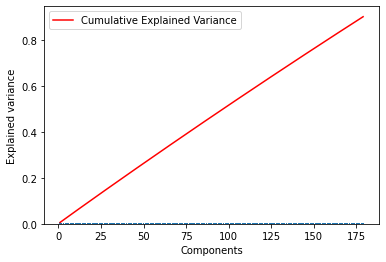

In [26]:
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

<p style="font-size:20px;">
Como esperado, a técnica de redução de dimencionalidade via PCA não apresenta um bom resultado, sendo necessário a utilização de uma quantidade de componentes principais quase igual a quantidade original de features do modelo para se conservar a informação. Uma quantidade pequena de componentes perde um percentual significativo das informações do dataset, o que reduzirá drasticamente a performance do modelo classificatório.
</p>
<p style="font-size:20px;">
Uma estratégia a ser analisada é a utilização dessa técnica posteriormente a alguma outra técnica de redução de dimensionalidade.
</p>

### UMAP

In [27]:
import umap

In [28]:
%%time
umap_ = umap.UMAP()
umap_.fit(X_train_scaled)

Wall time: 3min 28s


UMAP(dens_frac=0.0, dens_lambda=0.0)

In [29]:
X_train_scaled_umap = umap_.transform(X_train_scaled)

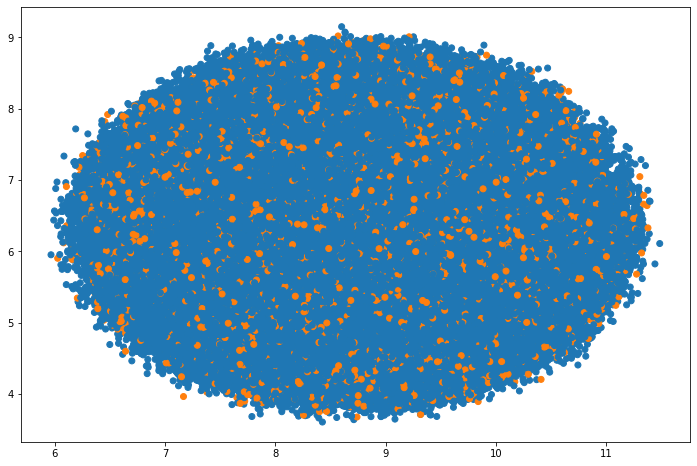

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled_umap[:, 0], X_train_scaled_umap[:, 1], c=[sns.color_palette()[x] for x in y_train]);

<p style="font-size:20px;">
O UMAP não parece ter conseguido separar os dados de forma adequada. Para fins de comparação, vamos comparar com o PCA com 2 componentes principais:
</p>

#### Comparação com o PCA

In [31]:
pca2 = PCA(n_components = 2)
pca2.fit(X_train_scaled)
X_train_scaled_pca2 = pca2.transform(X_train_scaled)

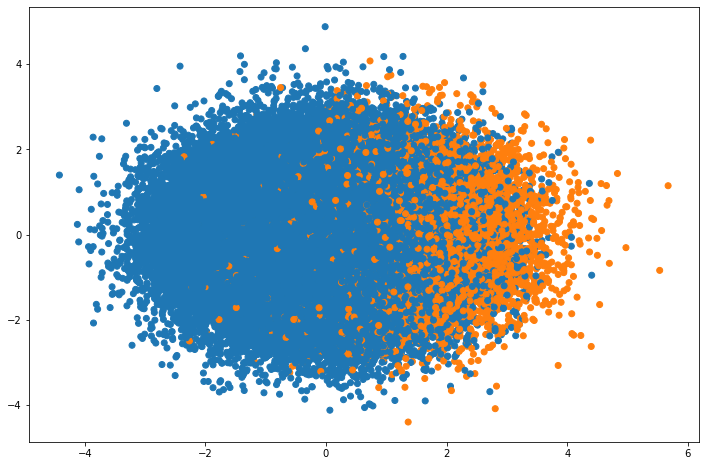

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_scaled_pca2[:, 0], X_train_scaled_pca2[:, 1], c=[sns.color_palette()[x] for x in y_train]);

In [33]:
pca2.explained_variance_ratio_

array([0.00580679, 0.00516481])

(-4.0, 4.0)

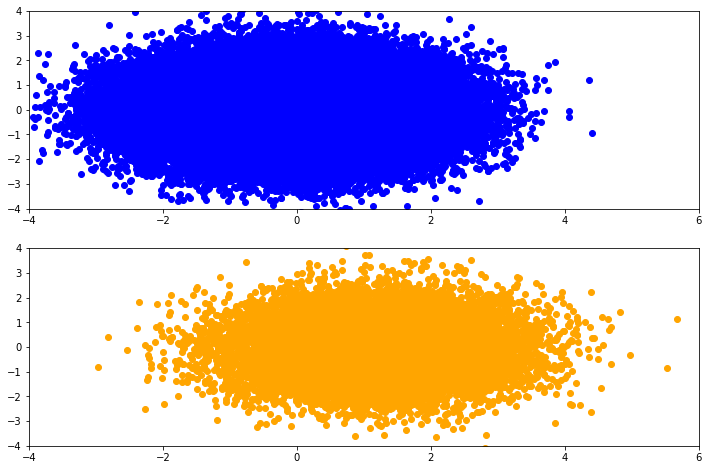

In [70]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
mask0 = y_train.map({0:True, 1:False})
mask1 = y_train.map({1:True, 0:False})
ax[0].scatter(X_train_scaled_pca2[:, 0][mask0], X_train_scaled_pca2[:, 1][mask0], c = 'blue')#, c=[sns.color_palette()[x] for x in y_train]);
ax[1].scatter(X_train_scaled_pca2[:, 0][mask1], X_train_scaled_pca2[:, 1][mask1], c='orange')#, c=[sns.color_palette()[x] for x in y_train]);
ax[0].set_xlim([-4,6])
ax[1].set_xlim([-4,6])
ax[0].set_ylim([-4,4])
ax[1].set_ylim([-4,4])

<p style="font-size:20px;">
Apesar do baixo valor de variância explicada, na plotagem a separação dos dados ao se utilizar o PCA ficou bem clara.
</p>
<p style="font-size:20px;">
Vamos fazer um teste com 3 PCs, o limite de componentes que nos permite analizar os dados graficamente.
</p>

In [34]:
pca3 = PCA(n_components = 3)
pca3.fit(X_train_scaled)
X_train_scaled_pca3 = pca3.transform(X_train_scaled)

In [35]:
# Plot initialisation
from mpl_toolkits.mplot3d import Axes3D

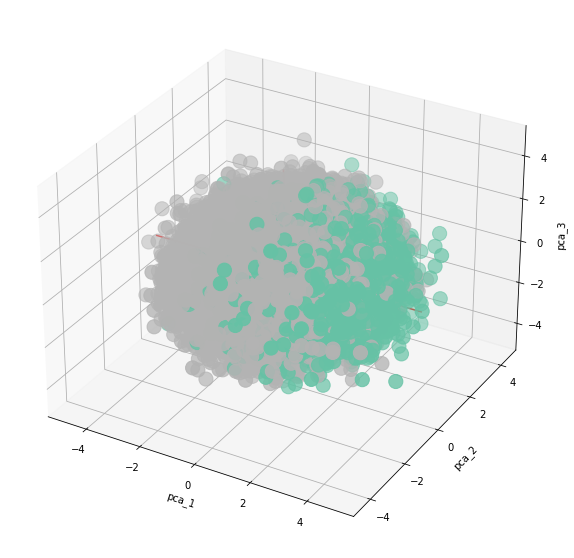

In [36]:
my_color=y_train
labels = [X_train_scaled_pca3[:,0], X_train_scaled_pca3[:,1], X_train_scaled_pca3[:,2]]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled_pca3[:,0], X_train_scaled_pca3[:,1], X_train_scaled_pca3[:,2], c=my_color, cmap="Set2_r", s=200, label=labels)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(X_train_scaled_pca3[:,0]), max(X_train_scaled_pca3[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(X_train_scaled_pca3[:,1]), max(X_train_scaled_pca3[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(X_train_scaled_pca3[:,2]), max(X_train_scaled_pca3[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
plt.show()

### Testando outras técnicas de redução de dimensionalidade

In [37]:
# from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS, SpectralEmbedding

In [38]:
# %%time
# lle = LocallyLinearEmbedding(n_components=2)
# lle.fit(X_train_scaled)
# X_train_scaled_lle = lle.transform(X_train_scaled)

In [39]:
# %%time
# iso = Isomap(n_components=2)
# iso.fit(X_train_scaled)
# X_train_scaled_iso = iso.transform(X_train_scaled)

In [40]:
# %%time
# spec = SpectralEmbedding(n_components=2)
# spec.fit(X_train_scaled)
# X_train_scaled_spec = spec.transform(X_train_scaled)

In [41]:
# %%time
# tsne = TSNE(n_components=2, learning_rate='auto',init='random')
# tsne.fit(X_train_scaled)
# X_train_scaled_tsne = tsne.transform(X_train_scaled)

In [42]:
# %%time
# mds_ = MDS(n_components=2)
# mds_.fit(X_train_scaled)
# X_train_scaled_mds = mds_.transform(X_train_scaled)

<p style="font-size:20px;">
O PCA apresentou resultados promissores com 2 e 3 componentes, assim utilizaremos o PCA com 25 componentes. Após a análise dos resultados dos modelos preditivos esse valor pode ser revisto.
</p>

In [43]:
pca25 = PCA(n_components = 25)
pca25.fit(X_train_scaled)
X_train_scaled_pca25 = pca25.transform(X_train_scaled)

## Detecção de Outliers

<p style="font-size:20px;">
Definida a técnica de redução de dimensionalidadea ser utilizada identificaremos possíveis outliers que poderiam influenciar o modelo negativamente.
</p>
<p style="font-size:20px;">
A alta dimensionalidade do modelo (mesmo após a redução dimensional), torna impossível avaliar os outliers indicados por qualquer técnica utilizada, desse modo, os outliers serão determinados a partir do cruzamento da identificação feita por duas técnicas diferentes: 
</p>
<ol style="font-size:17px;">
  <li>Isolation Forest</li>
  <li>KNN</li>
</ol>

### Isolation Forest

In [44]:
from sklearn.ensemble import IsolationForest

In [45]:
clf_isolation = IsolationForest(random_state=42)

In [46]:
clf_isolation.fit(X_train_scaled_pca25);

In [47]:
x_iso_out = clf_isolation.predict(X_train_scaled_pca25);

In [48]:
pd.Series(x_iso_out).value_counts()

 1    138573
-1      1427
dtype: int64

<p style="font-size:20px;">
Através da técnica de isolation forest oram encontrados 1512 outliers, correspondentes a 1% dos dados.
</p>

### KNN

In [49]:
from pyod.models.knn import KNN

In [50]:
clf_knn = KNN()

In [51]:
%%time
clf_knn.fit(X_train_scaled_pca25)

Wall time: 9min


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [52]:
x_knn_out = clf_knn.labels_;

In [53]:
pd.Series(x_knn_out).value_counts()

0    126000
1     14000
dtype: int64

<p style="font-size:20px;">
Através da técnica de KNN forest foram encontrados 14000 outliers, correspondentes a 10% dos dados.
</p>

#### Determinação dos outliers pela interceção dos resultados encontrados através das duas técnicas

In [54]:
mask_iso = pd.Series(x_iso_out).map({-1:True,1:False})

In [55]:
mask_knn = pd.Series(x_knn_out).map({1:True,0:False})

In [56]:
(mask_iso & mask_knn).value_counts()

False    138625
True       1375
dtype: int64

<p style="font-size:20px;">
No total 1451 foram determinados como outliers, o que corresponde a 1% do dataset de treino.
</p>

In [57]:
X_train_scaled_pca25_out = pd.DataFrame(X_train_scaled_pca25)
X_train_scaled_pca25_out = X_train_scaled_pca25_out[~(mask_iso & mask_knn)]

In [58]:
X_train_scaled_pca25_out

0         1         2         3         4         5         6   \
0       0.009804 -1.938043 -1.200432  1.756243  1.412817  0.547760 -0.197158   
1      -1.255385 -0.875765 -2.401699  1.103734 -0.728475  0.077000  0.223633   
2       0.342942  1.667127 -0.930434  0.923994  2.039964 -1.751080  0.518914   
3      -1.694318  0.354643  0.679129 -1.537309  0.959424 -2.737577 -1.355773   
4      -2.074211 -0.380244 -0.439735 -0.883685 -2.435719 -0.438739 -1.234083   
...          ...       ...       ...       ...       ...       ...       ...   
139994  0.678455  0.120806  1.707894  1.511404 -1.256900 -1.231268  1.018798   
139995 -0.823252  1.681305  1.295742  0.346032  0.596335 -1.850885 -0.460422   
139996  0.863101  1.038678 -0.224924  0.815971 -1.520826  0.605420  1.022675   
139998  0.381621 -0.222764 -2.274062 -1.919400  0.693114 -0.142982 -0.270037   
139999 -0.435299 -0.784597  0.193718  1.088114  0.669220  0.959078 -0.097944   

              7         8         9   ...        15        16        17  \
0      -0.224123 -0.778701  0.308939  ...  1.255805  0.675927  0.038407   
1      -1.533393  1.045875  0.106132  ... -0.539643  0.498691  0.715047   
2      -1.469822  0.456868 -0.220141  ...  0.314695 -2.824492 -1.983912   
3      -0.248156 -2.627848 -0.682079  ... -0.320119  0.115559  0.323868   
4      -1.055255 -1.350687 -0.041525  ...  1.010480  0.845150 -1.062498   
...          ...       ...       ...  ...       ...       ...       ...   
139994  0.721935 -0.875274  0.289169  ...  1.373965  0.466491 -0.748430   
139995  0.979779 -1.451483 -0.150776  ... -2.578741 -0.272938  0.565524   
139996 -1.724943  1.757783 -0.207873  ...  0.891899 -0.346392 -0.380705   
139998  0.366787 -0.354011  0.228582  ... -1.638647 -0.151146  1.892267   
139999  0.577769 -0.546350 -1.451600  ...  1.386829 -2.146874 -1.378247   

              18        19        20        21        22        23        24  
0       0.477490  0.591259  0.762331  1.005877  1.084896  1.473847  0.250293  
1      -0.930768  0.465667 -0.207787  1.846301 -0.126749  0.341796 -0.544060  
2       0.494609 -1.120874  0.286087  0.399731 -0.859343 -0.246152 -0.077475  
3      -1.317071 -0.946392  0.429328  0.084370 -1.242023  1.104653  0.308952  
4       1.331674 -0.443245 -0.546742 -0.632410  1.486109  0.542809  0.418854  
...          ...       ...       ...       ...       ...       ...       ...  
139994 -0.933375  1.519518 -0.873579  1.582027 -0.450413 -0.257736 -0.099734  
139995 -0.208178 -0.499290  1.571968  1.753483  0.442197  1.197749  0.419135  
139996  0.675158 -0.752396 -1.535143  1.369298 -0.475582 -1.925634 -0.616923  
139998 -0.414423  1.378009 -0.809397 -1.815340 -0.384993  0.134521  0.361361  
139999  0.698265  1.016662  0.634423  0.372401  2.056365  0.614371  1.585414  

[138625 rows x 25 columns]

## Balanceamento do Target

In [74]:
y_train_outknn = pd.DataFrame({'y':y_train}).reset_index()[(mask_knn)]['y']

In [76]:
y_train_outknn.value_counts(normalize=True)

0    0.824357
1    0.175643
Name: y, dtype: float64

In [71]:
y_train_out2 = pd.DataFrame({'y':y_train}).reset_index()[(mask_iso & mask_knn)]['y']

In [73]:
y_train_out2.value_counts(normalize=True)

0    0.749091
1    0.250909
Name: y, dtype: float64

## Treino do Modelo

In [59]:
y_train_out = pd.DataFrame({'y':y_train}).reset_index()[~(mask_iso & mask_knn)]['y']
y_train_out

0         0
1         0
2         1
3         0
4         0
         ..
139994    1
139995    0
139996    0
139998    0
139999    0
Name: y, Length: 138625, dtype: int64

In [60]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled_pca25 = pca25.transform(X_test_scaled)

In [61]:
# importando as bibliotecas dos modelos classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [63]:
%%time
# definindo uma lista com todos os modelos
classifiers = [
    LogisticRegression(max_iter=5000),
    # KNeighborsClassifier(),
    GaussianNB(),
    # SVC(),
    DecisionTreeClassifier(),
    # RandomForestClassifier(),
]

for clf in classifiers:
    start = time.process_time()
    
    clf.fit(X_train_scaled_pca25_out, y_train_out)
    y_pred = clf.predict(X_test_scaled_pca25)
        
    confusion = confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion.ravel()
    specificity = tn / (tn + fp)
    
    name = clf.__class__.__name__
    
    print("=" * 30)
    print(name)
    print("****Results****")    
    print('Accuracy=', accuracy_score(y_test, y_pred)) #((tp + tn) / float(tp + tn + fp + fn))
    print('Classification Error= ',1 - accuracy_score(y_test, y_pred)) #((fp + fn) / float(tp + tn + fp + fn))
    print('Sensitivity= ',recall_score(y_test, y_pred)) #(tp / float(fn + tp))
    print('Specificity= ',specificity) #tn / (tn + fp)
    print('Precision= ',precision_score(y_test, y_pred)) #tp / float(tp + fp)
    print('F1= ',f1_score(y_test,y_pred)) #(2*((precision*sensitivity)/(precision+sensitivity)))
    if name != 'SVC':
        print("ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test_scaled_pca25)[:, 1]))
    print('Time= ',time.process_time() - start)

LogisticRegression
****Results****
Accuracy= 0.9007333333333334
Classification Error=  0.09926666666666661
Sensitivity=  0.0693359375
Specificity=  0.9955808080808081
Precision=  0.641566265060241
F1=  0.12514688601645124
ROC AUC: 0.778413723850987
Time=  1.234375
GaussianNB
****Results****
Accuracy= 0.9009
Classification Error=  0.09909999999999997
Sensitivity=  0.08186848958333333
Specificity=  0.9943367498514557
Precision=  0.6225247524752475
F1=  0.14470655926352127
ROC AUC: 0.7829132775170518
Time=  0.578125
DecisionTreeClassifier
****Results****
Accuracy= 0.8356333333333333
Classification Error=  0.16436666666666666
Sensitivity=  0.22867838541666666
Specificity=  0.9048759655377302
Precision=  0.21522671568627452
F1=  0.22174873737373738
ROC AUC: 0.5667771754771984
Time=  21.296875
Wall time: 22.8 s
